# First Difference Rule

By Nathan Ramos, CFA

The First Difference Rule is a monetary policy rule that determines adjustments to the central bank's nominal interest rate based on changes in inflation and unemployment over time. Unlike the Taylor Rule, which directly relates policy rates to the current state of inflation and output gaps, the First Difference Rule focuses on the changes in these gaps to guide policy adjustments. This approach helps to smooth out short-term fluctuations and focus on longer-term trends in economic data.

In this notebook, we will utilize the `pyeconomics` package to compute the First Difference Rule interest rate based on data sourced from the FRED database. We will explore both the immediate rate adjustments and their historical context to understand the impact of policy changes over time.

## Importing Necessary Libraries

Before we begin the computations, we need to import the necessary libraries that will enable us to fetch data, perform calculations, and visualize results. This includes libraries for data manipulation, API access, and plotting.

In [1]:
# Import standard libraries
import sys
import os

# Configure system path
sys.path.insert(0, os.path.abspath('../../'))

# Import third-party libraries
import pandas as pd
import matplotlib.pyplot as plt

# Import pyeconomics module
import pyeconomics as pyecon

# Set up display for plots
%matplotlib inline

## Configuring API Access to FRED

To leverage the real-time data fetching capabilities of the `pyeconomics` package for Taylor Rule calculations, configure your FRED API access by [securely setting up your API key](../api_configuration/fred_api_configuration.ipynb). A detailed step-by-step guide on obtaining and securely storing your FRED API key with the `keyring` library is available in our dedicated notebook, ensuring compliance with FRED's security policies and preventing unauthorized access.

## FRED Series IDs for Economic Data

This section defines the series identifiers (IDs) used to fetch economic data from the FRED (Federal Reserve Economic Data) database. Adjusting these IDs allows users to select different data series that best match their analysis needs or data availability. The IDs set here correspond to key economic indicators relevant to the First Difference Rule calculation:

- **Inflation Series ID (`inflation_series_id`):** Points to the series used to measure the inflation rate. Currently set to track the PCE Trimmed Mean Inflation Rate.
- **Unemployment Rate Series ID (`unemployment_rate_series_id`):** Specifies the series for the unemployment rate. Here, it's set to track the general unemployment rate.
- **Natural Unemployment Series ID (`natural_unemployment_series_id`):** Indicates the series for the natural rate of unemployment, reflecting long-term unemployment unaffected by cyclical fluctuations.

These IDs are critical for ensuring that the First Difference Rule calculations are based on accurate and relevant economic data. Unlike the Taylor Rule, the First Difference Rule does not utilize the real interest rate directly, hence the absence of a Real Interest Rate Series ID.

In [2]:
# FRED Series IDs for economic data
inflation_series_id = 'PCETRIM12M159SFRBDAL'
unemployment_rate_series_id = 'UNRATE'
natural_unemployment_series_id = 'NROU'

# Print the series names and their IDs
print(f"Inflation Series ID:               {pyecon.fred_client.get_series_name(inflation_series_id)}")
print(f"Unemployment Rate Series ID:       {pyecon.fred_client.get_series_name(unemployment_rate_series_id)}")
print(f"Natural Unemployment Series ID:    {pyecon.fred_client.get_series_name(natural_unemployment_series_id)}")

Inflation Series ID:               Trimmed Mean PCE Inflation Rate
Unemployment Rate Series ID:       Unemployment Rate
Natural Unemployment Series ID:    Noncyclical Rate of Unemployment


## Model Assumptions and Parameters

This section outlines the assumptions and parameters used in the First Difference Rule calculation. These values can be adjusted to simulate different economic conditions and policy responses:

- **Inflation Target (`inflation_target`):** The target inflation rate, typically set by the central bank, which guides their monetary policy objectives.
- **Alpha (α) (`alpha`):** Represents the responsiveness of the policy interest rate to the inflation gap, i.e., the difference between actual inflation and the target inflation. This factor modifies the impact of inflation changes on the interest rate adjustment.
- **Rho (ρ) (`rho`):** This parameter adds inertia to the policy rate, reflecting the tendency of central banks to avoid large swings in interest rate changes from one period to the next.
- **Effective Lower Bound (ELB) (`elb`):** Sets a minimum value for the policy rate to prevent the recommendation of negative or impractically low interest rates.
- **Apply ELB (`apply_elb`):** A boolean control that determines whether the effective lower bound should be enforced in the First Difference Rule calculation.
- **Verbose (`verbose`):** A boolean setting that, when enabled, provides detailed output about the internal calculations and economic indicators used during the computation.

These settings allow analysts to evaluate how changes in policy and economic conditions might influence the central bank's decisions on interest rates using the First Difference Rule.

In [3]:
# Model Assumptions
inflation_target = 2.0
alpha = 0.5
rho = 0.90
elb = 0.125
apply_elb = True
verbose = True
include_ai_analysis = True

## Current First Difference Rule Calculation Using the FRED API

This section demonstrates the computation of the current recommended interest rate according to the First Difference Rule, utilizing real-time economic indicators fetched directly from the FRED (Federal Reserve Economic Data) API. [Ensure that your API credentials are correctly configured to fetch this data.](../api_configuration/fred_api_configuration.ipynb)

### First Difference Rule Formula

The First Difference Rule modifies the interest rate based on the changes in inflation and unemployment over time. This approach aims to address short-term volatility and emphasize sustained economic trends, reflecting ongoing adjustments rather than reacting to momentary fluctuations. The formula is expressed as:

$$
i_t = i_{t-1} + 0.5 \cdot (\pi_t - \pi^*) + (u^* - u_t) - (u^* - u_{t-4})
$$

Where:
- $i_t$: Recommended policy interest rate for the current period
- $i_{t-1}$: Previous period's policy interest rate
- $\pi_t$: Current inflation rate
- $\pi^*$: Target inflation rate, set by the central bank
- $u^*$: Natural rate of unemployment
- $u_t$: Current unemployment rate
- $u_{t-4}$: Unemployment rate four periods ago

This formula accounts for the evolution of economic indicators by incorporating a historical comparison. It applies a fixed responsiveness of 0.5 to the inflation gap, simplifying the adjustment process. Unlike the Taylor Rule, which bases adjustments on immediate economic conditions, the First Difference Rule uses changes over time to provide a smoothed response to economic fluctuations. This method offers a dynamic tool to evaluate potential central bank actions in adjusting interest rates in response to evolving economic conditions, providing a data-driven basis for monetary policy decisions.

In [4]:
# Economic Indicators for Current Calculation
indicators = pyecon.EconomicIndicators(
    inflation_series_id=inflation_series_id,
    unemployment_rate_series_id=unemployment_rate_series_id,
    natural_unemployment_series_id=natural_unemployment_series_id
)

# First Difference Rule Parameters
params = pyecon.FirstDifferenceRuleParameters(
    inflation_target=inflation_target,
    alpha=alpha,
    rho=rho,
    elb=elb,
    apply_elb=apply_elb,
    verbose=verbose,
    include_ai_analysis=include_ai_analysis
)

# Current First Difference Rule (FDR) calculation
current_fdr_rate = pyecon.first_difference_rule(indicators, params)


==== Economic Indicators ============================================
  Current Inflation:                               2.79%
  Target Inflation:                                2.00%
  Current Unemployment Rate:                       4.00%
  Lagged Unemployment Rate:                        3.60%
  Natural Unemployment Rate:                       4.41%
  Lagged Natural Unemployment Rate:                4.22%
  Last Fed Rate:                                   5.50%
  As of Date:                                      June 30, 2024

==== Gaps ===========================================================
  Inflation Gap:                                   0.79%
  Current Unemployment Gap:                        0.41%
  Lagged Unemployment Gap:                         0.62%

==== First Difference Rule (FDR) ====================================
  Last Fed Rate:                                 5.50%
  Alpha * Inflation Gap:                         + 0.50 * 0.79%
  Current Unemployment Gap Adjust

## Setting Preset Economic Indicators for Stagflation Simulation

Users can manually input preset values for key economic indicators to compute the First Difference Rule interest rate. This method allows for simulations under specific economic scenarios such as stagflation, which is characterized by high inflation and high unemployment, illustrating economic challenges:

- **Current Inflation Rate:** Set at 6.0% to simulate high inflation, indicative of rising prices during economic challenges, impacting cost of living and purchasing power.
- **Current Unemployment Rate:** Preset at 6.0%, showing substantial economic underperformance and labor market distress, typical in stagflation scenarios where growth is sluggish despite inflation.
- **Past Unemployment Rate:** Set at 4.0%, indicating a rise in unemployment from the previous period, useful for historical comparison in the First Difference Rule calculation.
- **Natural Unemployment Rate:** Set at 4.5%, representing a baseline where the labor market is more stable without cyclical pressures.
- **Past Natural Unemployment Rate:** Also set at 4.5%, indicating stability in the natural rate over time.
- **Federal Funds Rate:** Preset at 8.0%, reflecting a higher central bank interest rate possibly in response to high inflation, attempting to curb inflationary pressures while managing economic growth.

These preset values help simulate a scenario of stagflation and explore the impact on the recommended policy interest rate using the First Difference Rule. Adjust these values as needed to observe how different economic conditions might affect monetary policy decisions.

In [5]:
# Preset values for economic indicators in an economic stagflation scenario
indicators_preset = pyecon.EconomicIndicators(
    current_inflation_rate=6.0,
    current_unemployment_rate=6.0,
    natural_unemployment_rate=4.5,
    lagged_unemployment_rate=4.0,
    lagged_natural_unemployment_rate=4.5,
    current_fed_rate=8.0
)

# Calculate the First Difference Rule (FDR) interest rate using the preset data
fdr_estimate_preset = pyecon.first_difference_rule(
    indicators=indicators_preset,
    params=params
)


==== Economic Indicators ============================================
  Current Inflation:                               6.00%
  Target Inflation:                                2.00%
  Current Unemployment Rate:                       6.00%
  Lagged Unemployment Rate:                        4.00%
  Natural Unemployment Rate:                       4.50%
  Lagged Natural Unemployment Rate:                4.50%
  Last Fed Rate:                                   8.00%
  As of Date:                                      June 30, 2024

==== Gaps ===========================================================
  Inflation Gap:                                   4.00%
  Current Unemployment Gap:                        -1.50%
  Lagged Unemployment Gap:                         0.50%

==== First Difference Rule (FDR) ====================================
  Last Fed Rate:                                 8.00%
  Alpha * Inflation Gap:                         + 0.50 * 4.00%
  Current Unemployment Gap Adjus

### First Difference Rule Application in Stagflation Scenario

The First Difference Rule calculation yields an unadjusted interest rate estimate of 8.00%, maintained even after adjustments for policy inertia and the effective lower bound. The high inflation rate of 6.00% results in a significant inflation gap of 4.00%, suggesting substantial price increases above the Federal Reserve's target of 2.00%. Despite this, the interest rate recommendation remains at 8.00%, indicating strong monetary tightening. The unemployment rates show a worsening situation, with the current rate increasing from 4.00% last year to 6.00%, leading to a negative unemployment gap adjustment. This, coupled with the unchanged Federal Funds Rate post-adjustment, suggests that the Federal Reserve might continue with a high interest rate policy to combat inflation, albeit carefully monitoring the rising unemployment to avoid exacerbating economic stagnation or moving into a recessionary environment.

## Historical First Difference Rule Calculation

Now, we will compute the First Difference Rule based on historical data sourced from the FRED API. This will allow us to see how the estimated interest rate has evolved over time.

In [6]:
# Historical Economic Indicators for Calculation
indicators_historical = pyecon.EconomicIndicators(
    inflation_series_id=inflation_series_id,
    unemployment_rate_series_id=unemployment_rate_series_id,
    natural_unemployment_series_id=natural_unemployment_series_id
)

# Historical First Difference Rule (FDR) calculation using FRED data
historical_rates = pyecon.historical_first_difference_rule(
    indicators=indicators_historical,
    params=params
)

## Visualization of Historical Data

Plotting the historical First Difference Rule estimates provides visual insight into how economic policy guidance might have changed in response to economic indicators over time.

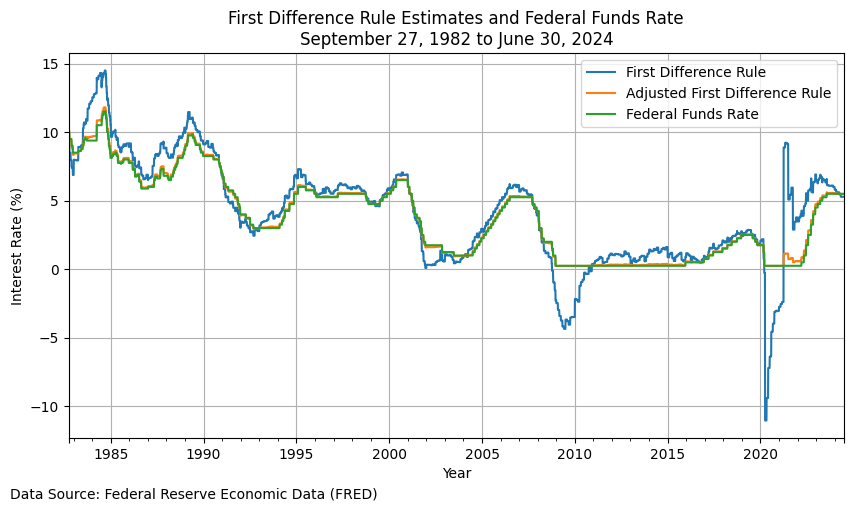

In [7]:
# Plotting Historical FDR
params.include_ai_analysis = False
pyecon.plot_historical_fdr(historical_rates, params)

# Conclusion

This notebook demonstrates the use of the `pyeconomics` package to calculate and visualize the First Difference Rule. These tools can aid economists, policymakers, and financial analysts in understanding and predicting central bank behavior regarding interest rates under varying economic conditions. 
